#### J034 Meghna Jayakar Lab 1 

21/7/24

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.stem import WordNetLemmatizer
import string
import collections 
from collections import Counter
from wordcloud import WordCloud
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Meghna\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df = pd.read_csv('./spam.csv', encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[['v1', 'v2']]
df

df.columns = ['label', 'message']

In [5]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df['length'] = df['message'].apply(len)
df.sort_values(by = 'length', ascending = False)

,label,message,length
1084,ham,For me the love should start with attraction.i...,910
1862,ham,The last thing i ever wanted to do was hurt yo...,790
2433,ham,Indians r poor but India is not a poor country...,632
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2847,ham,Sad story of a Man - Last week was my b'day. M...,588
...,...,...,...
5268,ham,\ER,3
4496,ham,Ok,2
5357,ham,Ok,2
1924,ham,Ok,2


### Most Frequent Words in Spam Messages

In [7]:
spam_words = ' '.join(df[df['label'] == 'spam']['message'])
spam_tokens = nltk.word_tokenize(spam_words)

In [8]:
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in spam_tokens if word.isalpha() and word.lower() not in stop_words]

In [9]:
word_frequency = Counter(filtered_words)
most_common_words = word_frequency.most_common(10)
words, counts = zip(*most_common_words)

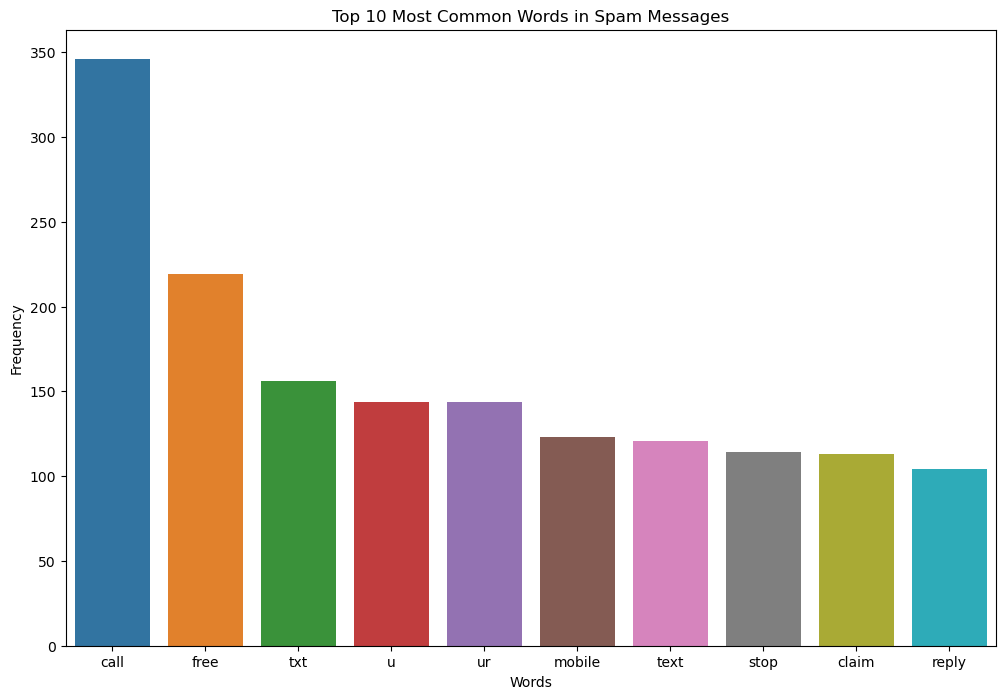

In [10]:
plt.figure(figsize = (12, 8))
sns.barplot(x = list(words), y = list(counts))
plt.title('Top 10 Most Common Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### Most Frequent Words in Ham Messages

In [11]:
ham_words = ' '.join(df[df['label'] == 'ham']['message'])
ham_tokens = nltk.word_tokenize(ham_words)

In [12]:
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in ham_tokens if word.isalpha() and word.lower() not in stop_words]

In [13]:
word_frequency = Counter(filtered_words)
most_common_words = word_frequency.most_common(10)
words, counts = zip(*most_common_words)

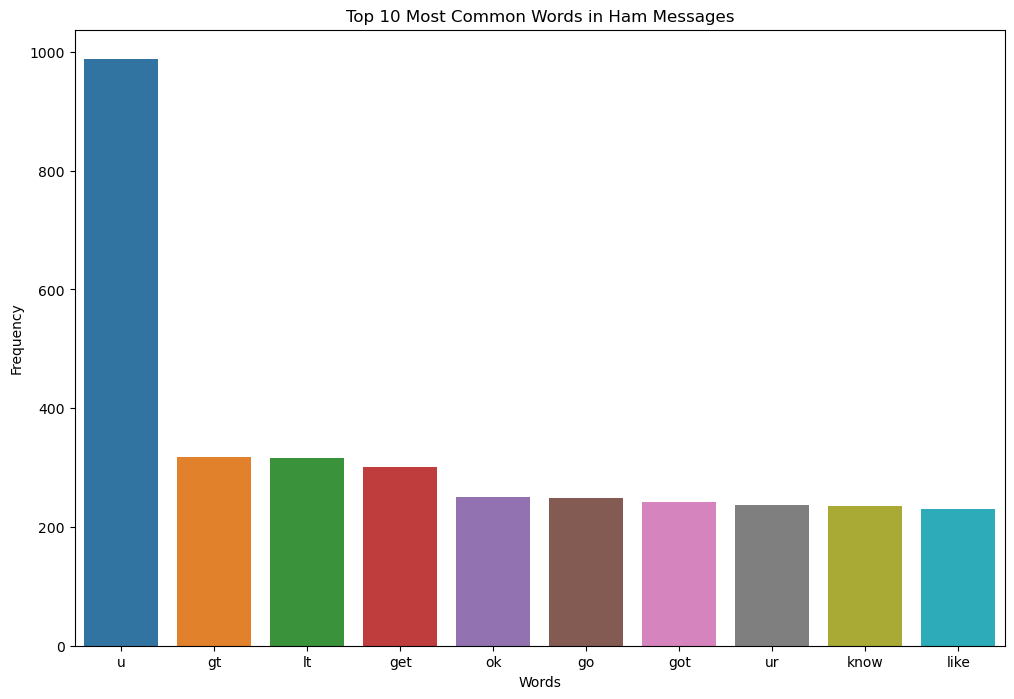

In [14]:
plt.figure(figsize = (12, 8))
sns.barplot(x = list(words), y = list(counts))
plt.title('Top 10 Most Common Words in Ham Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [15]:
def process_messages(messages):
    tokens = nltk.word_tokenize(messages)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return filtered_tokens

### Most Frequent bi-grams and tri-grams in Spam Messages

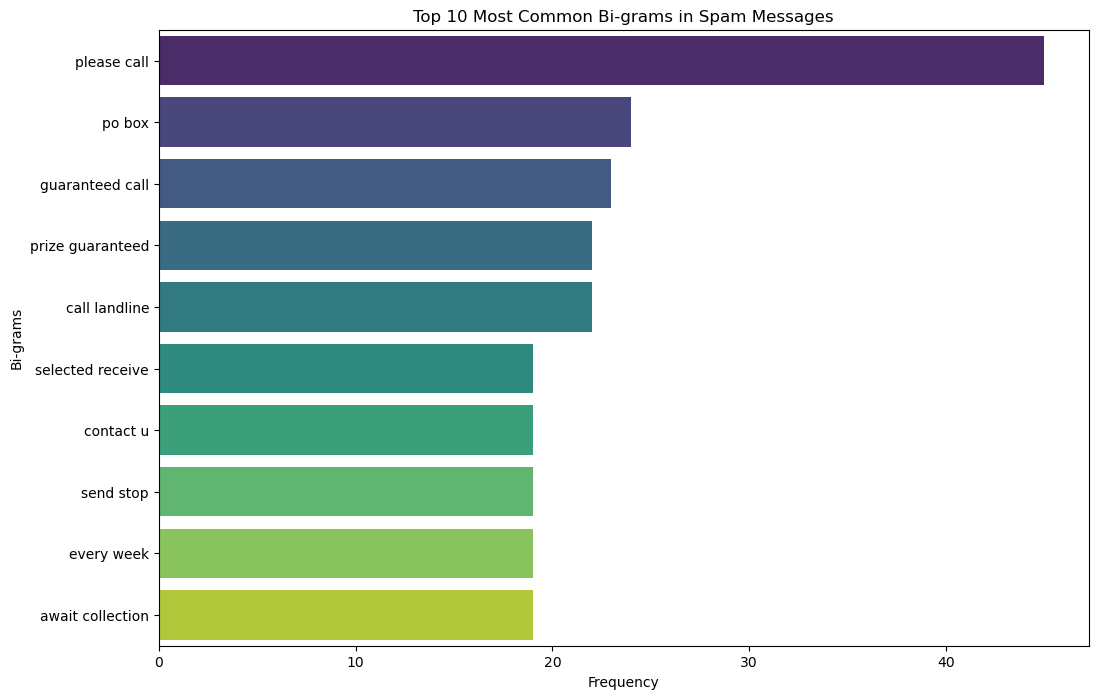

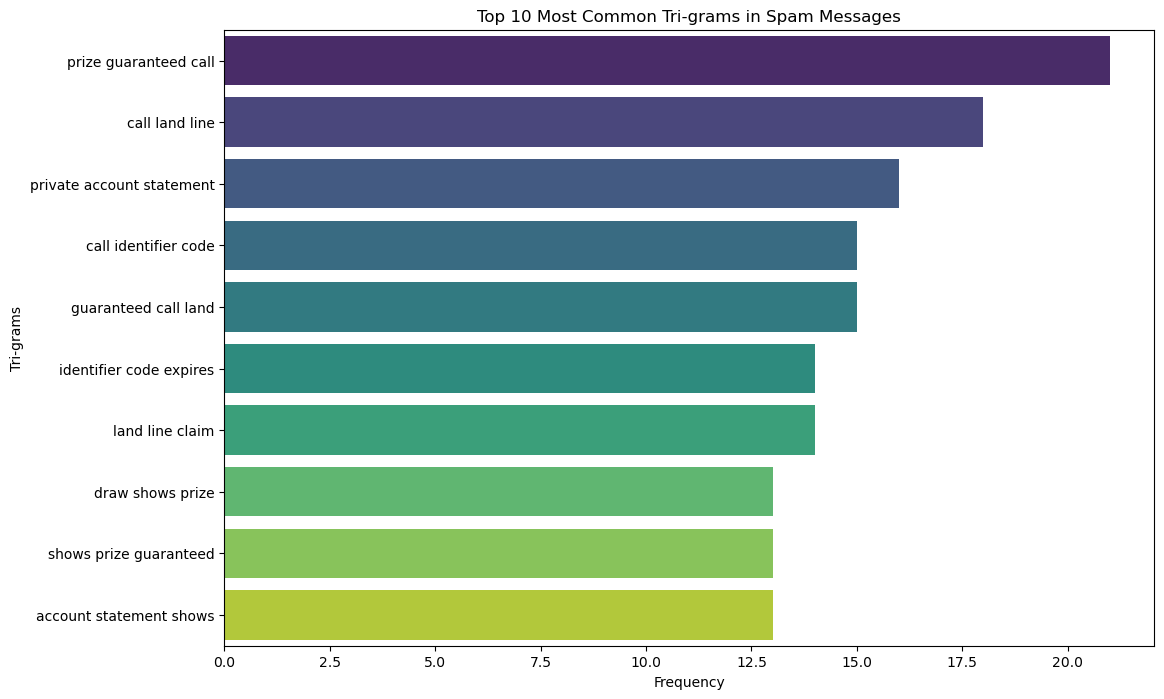

In [16]:
spam_messages = ' '.join(df[df['label'] == 'spam']['message'])

spam_tokens = process_messages(spam_messages)

spam_bigrams = list(ngrams(spam_tokens, 2))
spam_trigrams = list(ngrams(spam_tokens, 3))

spam_bigram_freq = Counter(spam_bigrams)
spam_trigram_freq = Counter(spam_trigrams)

most_common_bigrams = spam_bigram_freq.most_common(10)
bigram_list, count_list = zip(*most_common_bigrams)

bigram_list = [' '.join(bigram) for bigram in bigram_list]

bigram_df = pd.DataFrame({'Bigram': bigram_list, 'Count': count_list})

plt.figure(figsize = (12, 8))
sns.barplot(x = 'Count', y = 'Bigram', data = bigram_df, palette = 'viridis')
plt.title('Top 10 Most Common Bi-grams in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.show()

most_common_trigrams = spam_trigram_freq.most_common(10)
trigram_list, trigram_count_list = zip(*most_common_trigrams)

trigram_list = [' '.join(trigram) for trigram in trigram_list]

trigram_df = pd.DataFrame({'Trigram': trigram_list, 'Count': trigram_count_list})

plt.figure(figsize = (12, 8))
sns.barplot(x = 'Count', y = 'Trigram', data = trigram_df, palette = 'viridis')
plt.title('Top 10 Most Common Tri-grams in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Tri-grams')
plt.show()

### Most Frequent bi-grams and tri-grams in Ham Messages

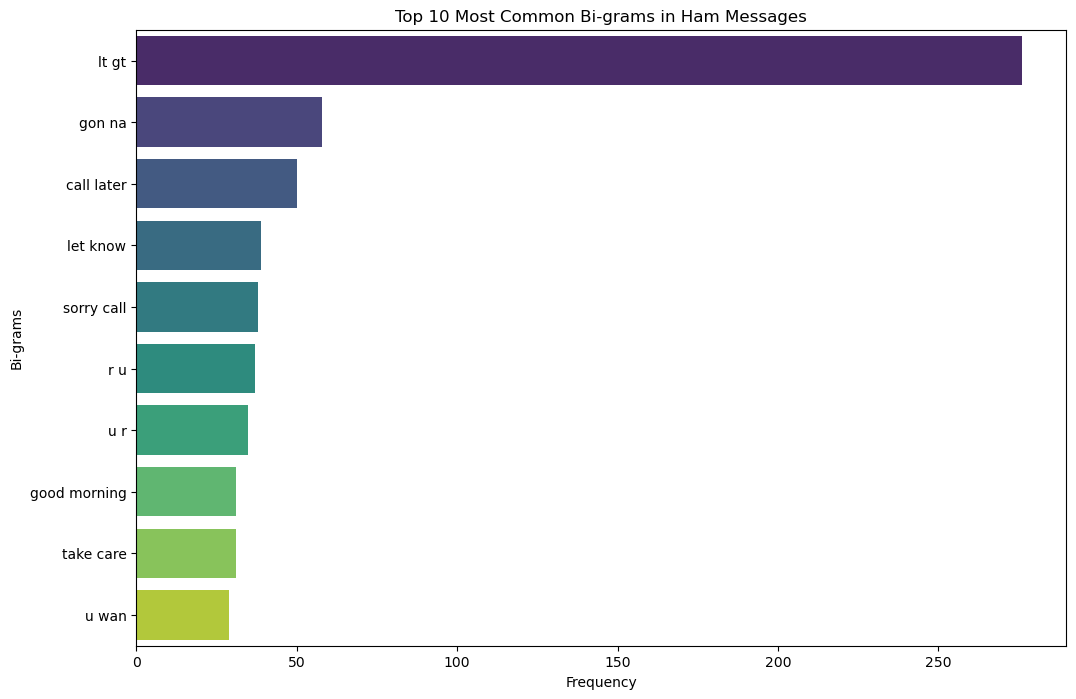

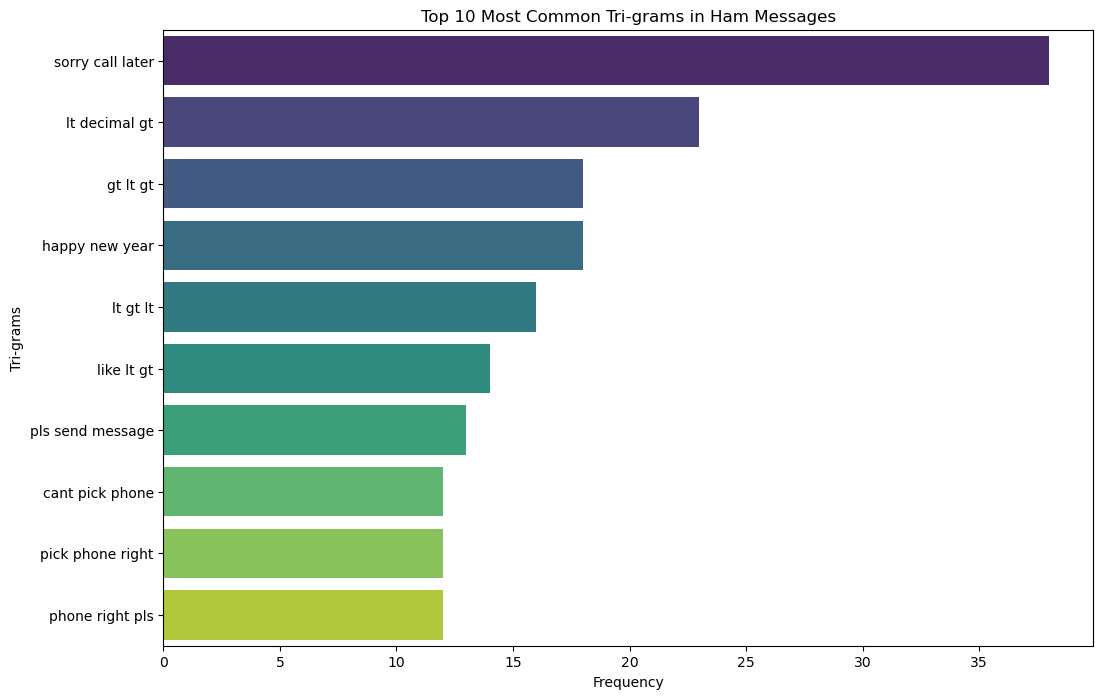

In [17]:
ham_messages = ' '.join(df[df['label'] == 'ham']['message'])

ham_tokens = process_messages(ham_messages)

ham_bigrams = list(ngrams(ham_tokens, 2))
ham_trigrams = list(ngrams(ham_tokens, 3))

ham_bigram_freq = Counter(ham_bigrams)
ham_trigram_freq = Counter(ham_trigrams)

most_common_bigrams = ham_bigram_freq.most_common(10)
bigram_list, count_list = zip(*most_common_bigrams)

bigram_list = [' '.join(bigram) for bigram in bigram_list]

bigram_df = pd.DataFrame({'Bigram': bigram_list, 'Count': count_list})

plt.figure(figsize = (12, 8))
sns.barplot(x = 'Count', y = 'Bigram', data = bigram_df, palette = 'viridis')
plt.title('Top 10 Most Common Bi-grams in Ham Messages')
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.show()

most_common_trigrams = ham_trigram_freq.most_common(10)
trigram_list, trigram_count_list = zip(*most_common_trigrams)

trigram_list = [' '.join(trigram) for trigram in trigram_list]

trigram_df = pd.DataFrame({'Trigram': trigram_list, 'Count': trigram_count_list})

plt.figure(figsize = (12, 8))
sns.barplot(x = 'Count', y = 'Trigram', data = trigram_df, palette = 'viridis')
plt.title('Top 10 Most Common Tri-grams in Ham Messages')
plt.xlabel('Frequency')
plt.ylabel('Tri-grams')
plt.show()

### Wordcloud for Spam Messages

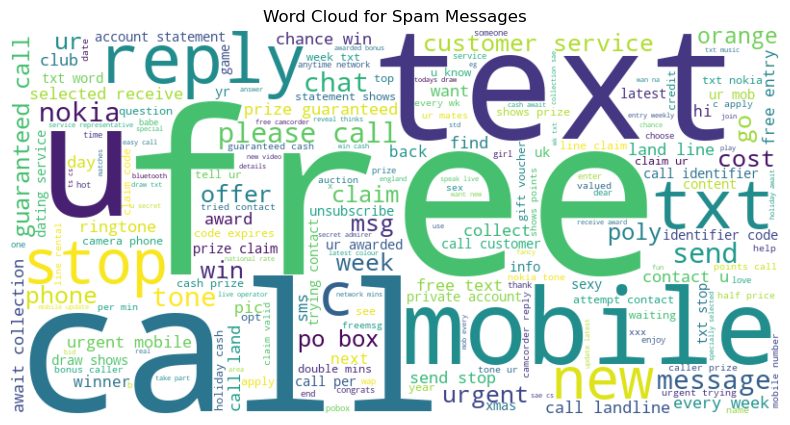

In [18]:
spam_messages = ' '.join(df[df['label'] == 'spam']['message'])

spam_tokens = process_messages(spam_messages)

spam_text = ' '.join(spam_tokens)

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(spam_text)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

### Wordcloud for Ham Messages

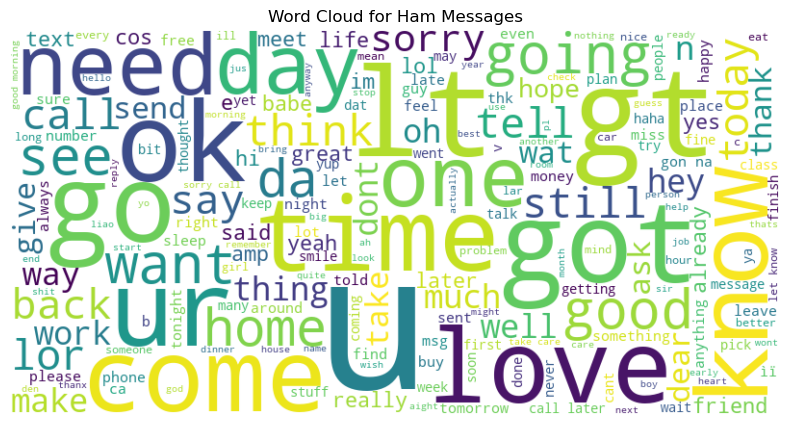

In [19]:
ham_messages = ' '.join(df[df['label'] == 'ham']['message'])

ham_tokens = process_messages(ham_messages)

ham_text = ' '.join(ham_tokens)

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(ham_text)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

### Bag-of-words Model

In [23]:
def process_messages(messages):
    tokens = nltk.word_tokenize(messages)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [24]:
df['processed_message'] = df['message'].apply(process_messages)

In [28]:
vectorizer = CountVectorizer()
x = df['processed_message']
y = df['label']

In [30]:
xtransformed = vectorizer.fit_transform(x)
xtransformed

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(xtransformed, y, test_size = 0.2, random_state = 42)

In [34]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [35]:
ypreds_bow = logreg.predict(xtest)
ypreds_bow

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [46]:
f1_logreg_bow = f1_score(ytest, ypreds_bow, pos_label = 'spam')
print(f'Logsitic Regression F1 Score: {f1_logreg_bow.round(4) * 100}')

Logsitic Regression F1 Score: 90.51


### Tf-IDF 

In [49]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer

TfidfTransformer()

In [50]:
xtfidf = tfidf_transformer.fit_transform(xtransformed)

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(xtfidf, y, test_size = 0.2, random_state = 42)

In [53]:
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [54]:
ypreds_tfidf = logreg.predict(xtest)
ypreds_tfidf

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [55]:
f1_logreg_tfidf = f1_score(ytest, ypreds_tfidf, pos_label = 'spam')
print(f'Logsitic Regression F1 Score: {f1_logreg_tfidf.round(4) * 100}')

Logsitic Regression F1 Score: 75.0


### Tf-IDF after Text Preprocessing

In [56]:
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Return processed text
    return ' '.join(tokens)

In [66]:
df['preprocessed_message'] = df['message'].apply(preprocess_text)

In [68]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer

TfidfVectorizer()

In [69]:
x = df['preprocessed_message']
y = df['label']

In [70]:
xtfidfvec = tfidf_vectorizer.fit_transform(x)

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(xtfidfvec, y, test_size = 0.2, random_state = 42)

In [72]:
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [73]:
ypreds_tfidfvec = logreg.predict(xtest)
ypreds_tfidfvec

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [74]:
f1_logreg_tfidfvec = f1_score(ytest, ypreds_tfidfvec, pos_label = 'spam')
print(f'Logsitic Regression F1 Score: {f1_logreg_tfidfvec.round(4) * 100}')

Logsitic Regression F1 Score: 76.8


### Model F1 Scores 

Bag of Words Model: 90.51

Tf-IDF: 75

Tf-IDF with Text Preprocessing: 76.8